In [29]:
#importing the required libraries in the npl_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json



In [30]:
#loading the json file first 
with open(r'C:\Users\sanga\Desktop\npl\data\npl_data.json') as f:
    data = json.load(f)

In [33]:
#1... Data preparation and cleaning 

#Team DataFrame 
#first of all normalizing the data for the uniform scale 
teams_df=pd.json_normalize(data['teams'])
teams_df=teams_df[['id', 'name', 'marquee_player', 'players']]

#to remove the big bracket from the column players we use the join method 
teams_df["Players"] = teams_df["players"].apply(lambda x: ','.join(x))
teams_df

,id,name,marquee_player,players,Players
0,BK,Biratnagar Kings,Sandeep Lamichhane,"[Lokesh Bam, Pratish GC, Bashir Ahmad, Rajesh ...","Lokesh Bam,Pratish GC,Bashir Ahmad,Rajesh Pula..."
1,CWR,Chitwan Rhinos,Kushal Malla,"[Rijan Dhakal, Kamal Singh Airee, Sharad Vesaw...","Rijan Dhakal,Kamal Singh Airee,Sharad Vesawkar..."
2,JB,Janakpur Bolts,Aasif Sheikh,"[Lalit Rajbanshi, Anil Kumar Sah, Rupesh K Sin...","Lalit Rajbanshi,Anil Kumar Sah,Rupesh K Singh,..."
3,KNY,Karnali Yaks,Sompal Kami,"[Gulshan Kumar Jha, Nandan Yadav, Mausam Dhaka...","Gulshan Kumar Jha,Nandan Yadav,Mausam Dhakal,A..."
4,KMG,Kathmandu Gurkhas,Karan KC,"[Shahab Alam, Bhim Sharki, Rashid Khan, Shanka...","Shahab Alam,Bhim Sharki,Rashid Khan,Shankar Ra..."
5,LBL,Lumbini Lions,Rohit Kumar Paudel,"[Surya Tamang, Bibek Yadav, Sundeep Jora, Aash...","Surya Tamang,Bibek Yadav,Sundeep Jora,Aashutos..."
6,PKA,Pokhara Avengers,Kushal Bhurtel,"[Sagar Dhakal, Aakash Chand, Kiran Kumar Thagu...","Sagar Dhakal,Aakash Chand,Kiran Kumar Thagunna..."
7,SPR,Sudurpaschim Royals,Dipendra Singh Airee,"[Md Aarif Sheikh, Abinash Bohara, Binod Bhanda...","Md Aarif Sheikh,Abinash Bohara,Binod Bhandari,..."


In [59]:
#saving the teams_df to a csv file
teams_df.to_csv(r'C:\Users\sanga\Desktop\npl\data\teams_data.csv',index=False)

In [34]:
#Creating the Dataframe of the matches 
matches_list=[]
for match in data['matches']:
    for match_key,match_details in match.items():
        #creating the match_info dictionary to store the details of the matches
        match_info={
            'match_number':match_details.get('match_number'),
            'date':match_details.get('date'),
            'time':match_details.get('time'),
            'title':match_details.get("TITLE") or match_details.get('title'),
            'team1':match_details['PAIRINGS'][0] if 'PAIRINGS' in match_details else None,
            'team2':match_details['PAIRINGS'][1] if 'PAIRINGS' in match_details else None, 
            'team1_runs':match_details['score'][0]['runs'] if 'score' in match_details else None,
            'team2_runs':match_details['score'][1]['runs'] if 'score' in match_details else None,
            'result':match_details.get('result'),
            'player_of_the_match':match_details.get('player_of_the_match'),
            'top_batter':match_details.get('top_batter', {}).get('player'),
            'top_bowler':match_details.get('top_bowler', {}).get('player'),
            'venue':match_details.get('venue')
            
        }

        #adding the match_info also so,
        matches_list.append(match_info)
#declaring the dataframe of the matches 
matches_df=pd.DataFrame(matches_list)

    


In [35]:
#Displaying the DataFrame of the matches
matches_df.head()

,match_number,date,time,title,team1,team2,team1_runs,team2_runs,result,player_of_the_match,top_batter,top_bowler,venue
0,1,2024/11/30,12:15 PM,BIRATNAGAR KINGS VS JANAKPUR BOLTS,BK,JKB,127,131,JKB Won By 8 Wickets,Lahiru Milantha,Lahiru Milantha,Lalit Rajbanshi,Tribhuvan University International Cricket Gro...
1,2,2024/12/02,09:00 AM,KATHMANDU GURKHAS VS CHITWAN RHINOS,KMG,CWR,111,114,CWR Won By 5 Wickets,Sohail Tanvir,Sumit Maharjan,Sohail Tanvir,Tribhuvan University International Cricket Gro...
2,3,2024/12/02,01:00 PM,JANAKPUR BOLTS VS KARNALI YAKS,JKB,KNY,141,142,JKB Won By 8 Wickets,Anil Sah,Anil Sah,Mohammad Mohsin,Tribhuvan University International Cricket Gro...
3,4,2024/12/03,09:00 AM,SUDURPASCHIM ROYALS VS BIRATNAGAR KINGS,SPR,BK,182,92,SPR Won By 90 Runs,Dipendra Singh Airee,Dipendra Singh Airee,Abinash Bohara,Tribhuvan University International Cricket Gro...
4,5,2024/12/03,01:00 PM,CHITWAN RHINOS VS POKHARA AVENGERS,CWR,PKA,161,74,CWR Won By 87 Runs,Rijan Dhakal,Ravi Bopara,Sohail Tanvir,Tribhuvan University International Cricket Gro...


In [60]:
#saving the cleaned_matches_df to a csv file
matches_df.to_csv(r'C:\Users\sanga\Desktop\npl\data\matches_data.csv', index=False)

In [61]:
#Creating the points table DataFrame 
points_table_df=pd.DataFrame(data['points_table'])

In [62]:
#Displaying the points table DataFrame
points_table_df.head()

,rank,team,matches_played,wins,losses,nrr,points
0,1,Janakpur Bolts,7,5,2,+0.164,10
1,2,Sudurpaschim Royals,7,6,1,+2.087,12
2,3,Karnali Yaks,7,4,3,+0.300,8
3,4,Chitwan Rhinos,7,4,3,+0.634,8
4,5,Kathmandu Gurkhas,7,4,3,-0.321,8


In [64]:
#saving the points table DataFrame to a csv file
points_table_df.to_csv(r'C:\Users\sanga\Desktop\npl\data\points_data.csv', index=False)

In [65]:
#creating the result dataframe by converting it to the uniform scale data 
result_df=pd.json_normalize(data['result'])

In [66]:
#creating the dictionary for the result  
results_dict={}
for item in data['result']:
    for key,value in item.items():
        results_dict[key]=value

#creating the dataframe from the dictionary method 
result_df=pd.DataFrame([results_dict])

In [67]:
#displaying the result dataframe 
#only creating the first ,second and third place in the match results 
result_df.head()

,winner,runner_up,third_place
0,Janakpur Bolts,Sudurpaschim Royals,Karnali Yaks


In [69]:
#saving the cleaned result_df to a csv file
result_df.to_csv(r'C:\Users\sanga\Desktop\npl\data\result_data.csv', index=False)

In [70]:
#Exploratory Data Analysis (EDA)

#Team performance Analysis(How many times an individual team win in the matches)
matches_df['winning_team']=matches_df['result'].str.extract(r'(\b\w+\b) Won')
team_wins=matches_df['winning_team'].value_counts().reset_index()
team_wins.columns=['Team','Wins']

In [71]:
#Displaying the team perfomance analysis 
team_wins

,Team,Wins
0,JKB,7
1,SPR,7
2,KNY,5
3,CWR,4
4,KMG,4
5,BK,2
6,PKA,1
7,LBL,1


In [72]:
#player performance analysis 
#analysing the performance of the player by displaying the top batter and the bollower in the entire npl league

top_batters=matches_df.groupby('top_batter')['top_batter'].count().sort_values(ascending=False).head()
top_bowlers=matches_df.groupby('top_bowler')['top_bowler'].count().sort_values(ascending=False).head()

In [73]:
top_batters

top_batter
Lahiru Milantha    3
William Bosisto    2
Anil Sah           2
Binod Bhandari     2
Ravi Bopara        2
Name: top_batter, dtype: int64

In [74]:
#displaying the top bowlers 
top_bowlers


top_bowler
Lalit Rajbanshi    4
Kishore Mahato     2
Bipin Khatri       2
Bipin Sharma       2
Sohail Tanvir      2
Name: top_bowler, dtype: int64

In [75]:
#making  the top scorers 
top_scorers=matches_df.groupby('top_batter')['team1_runs'].sum().sort_values(ascending=False).head()

In [76]:
# Creating a DataFrame for top scorers
top_scorers_df = top_scorers.reset_index()
top_scorers_df.columns = ['Player', 'Runs']
top_scorers_df


,Player,Runs
0,Lahiru Milantha,449
1,Ravi Bopara,291
2,Anil Sah,277
3,Binod Bhandari,262
4,William Bosisto,261


In [77]:
#top_wicket_takers in the league by the matches 
top_wicket_takers=matches_df.groupby('top_bowler')['team1_runs'].count().sort_values(ascending=False)

In [78]:
#displaying the top wicket takers in the league 
top_wicket_takers_df=top_wicket_takers.reset_index()
top_wicket_takers_df.columns=['Player','No of Wickets']
top_wicket_takers_df.head()

,Player,No of Wickets
0,Lalit Rajbanshi,4
1,Kishore Mahato,2
2,Bipin Khatri,2
3,Bipin Sharma,2
4,Sohail Tanvir,2


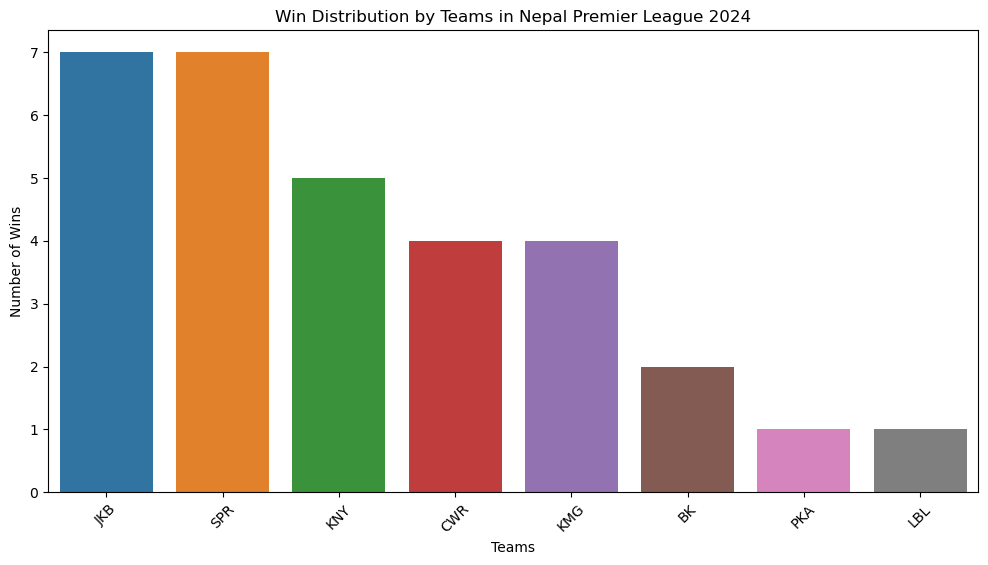

In [79]:
#Data Visualization 

#Win Distribution 
plt.figure(figsize=(12,6))
sns.barplot(data=team_wins,x="Team",y='Wins',hue="Team",legend=False)
plt.title('Win Distribution by Teams in Nepal Premier League 2024')
plt.xlabel("Teams")
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

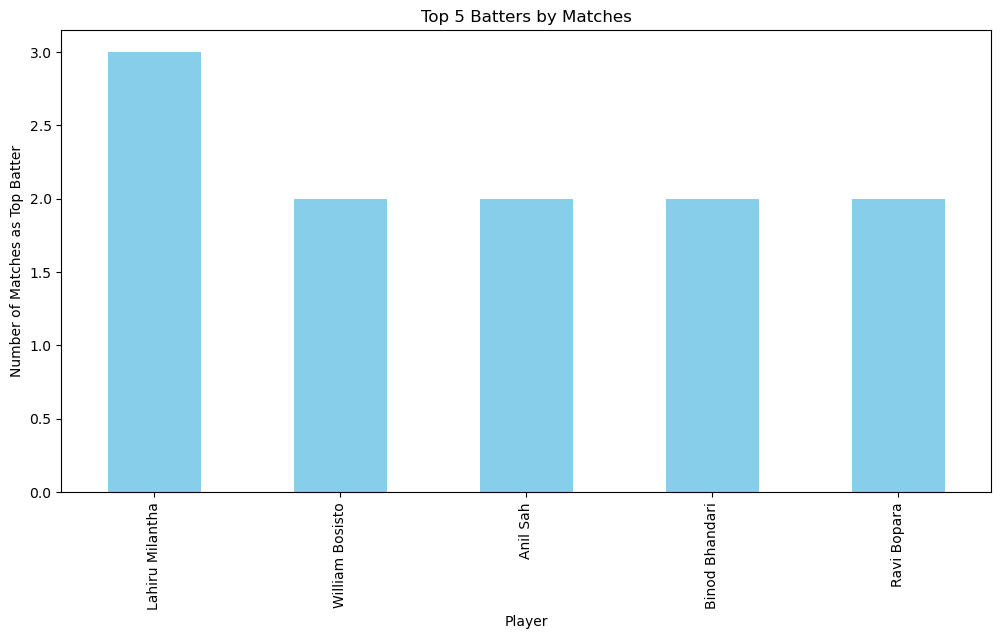

In [80]:
#Top Batters 
top_batters.plot(kind='bar',color='skyblue',figsize=(12,6))
plt.title('Top 5 Batters by Matches')
plt.xlabel('Player')
plt.ylabel("Number of Matches as Top Batter")
plt.show()

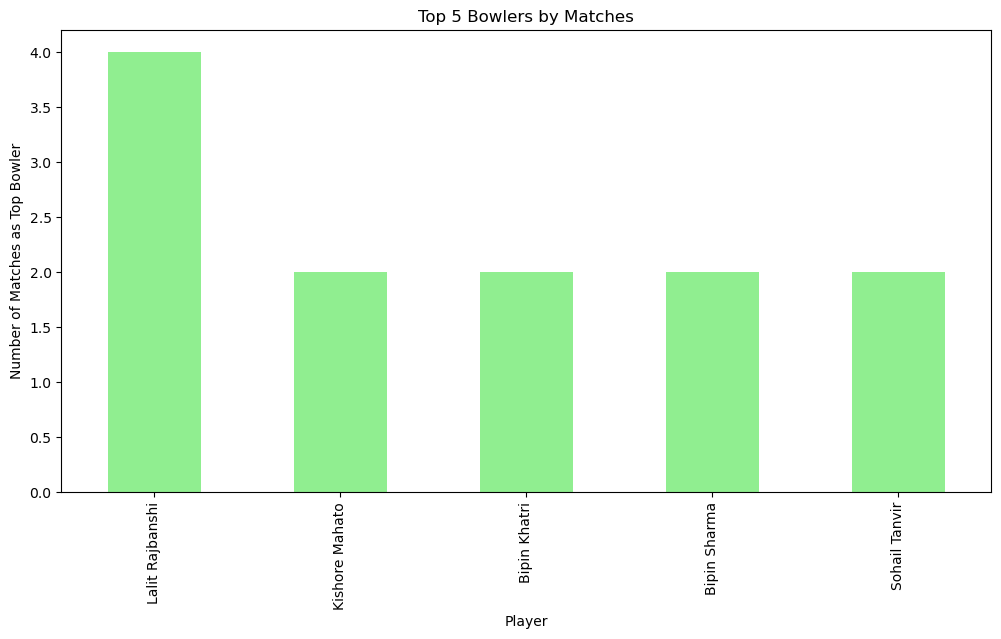

In [81]:
#Top Bowlers 
top_bowlers.plot(kind='bar',color='lightgreen',figsize=(12,6))
plt.title('Top 5 Bowlers by Matches')
plt.xlabel('Player')
plt.ylabel("Number of Matches as Top Bowler")
plt.show()


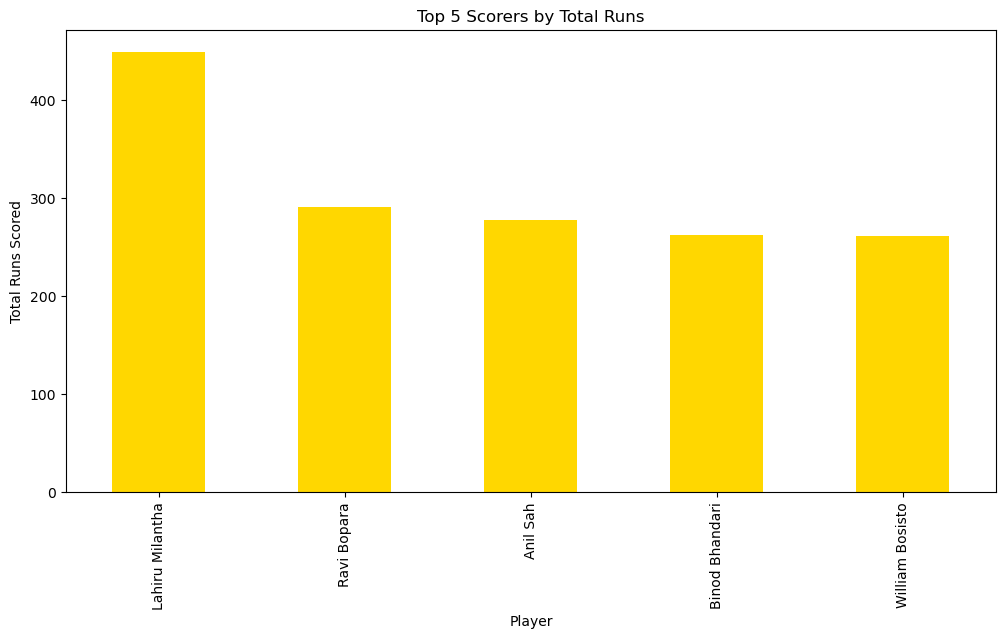

In [24]:
#visualizing the top scorers 
top_scorers.plot(kind='bar',color='gold',figsize=(12,6))
plt.title('Top 5 Scorers by Total Runs')
plt.xlabel('Player')
plt.ylabel('Total Runs Scored')
plt.show()


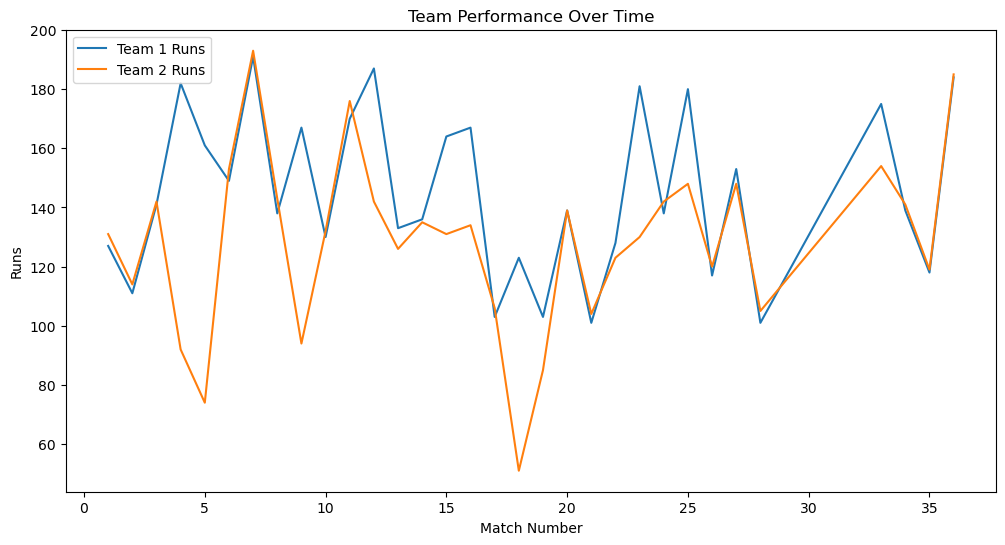

In [82]:
# Convert non-numeric match numbers to numeric for plotting
matches_df['match_number_numeric'] = matches_df['match_number'].apply(
	lambda x: int(x) if str(x).isdigit() else None
)

# Assign numeric values to special match numbers
special_matches = {'Eliminator': 33, 'Qualifier 1': 34, 'Qualifier 2': 35, 'Final': 36}
matches_df['match_number_numeric'] = matches_df['match_number_numeric'].fillna(
	matches_df['match_number'].map(special_matches)
)

# To visualize the team performance over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=matches_df, x='match_number_numeric', y='team1_runs', label='Team 1 Runs')
sns.lineplot(data=matches_df, x='match_number_numeric', y='team2_runs', label='Team 2 Runs')
plt.xlabel('Match Number')
plt.ylabel('Runs')
plt.title('Team Performance Over Time')
plt.show()

Text(0.5, 1.0, 'Match Results Heatmap')

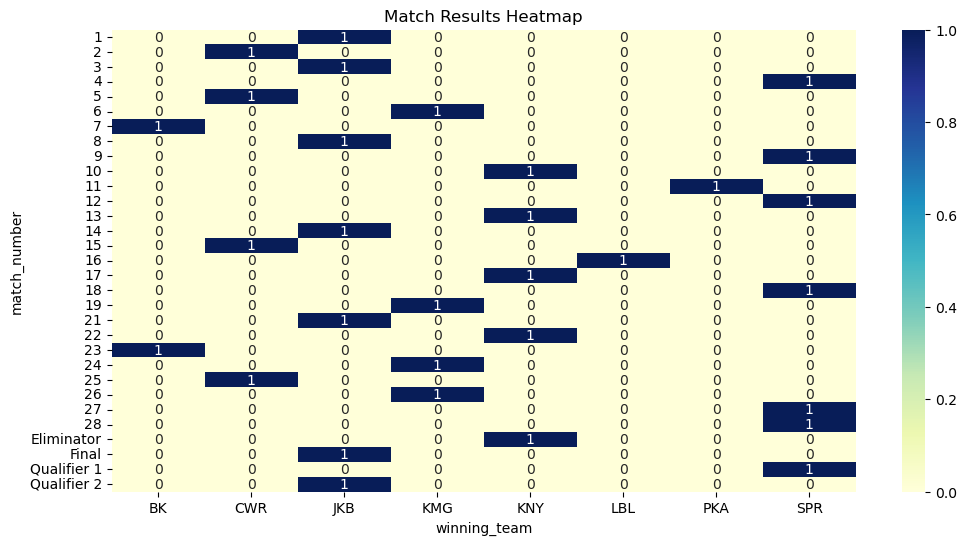

In [86]:
#match results heatmap 
plt.figure(figsize=(12, 6))
# Create a pivot table for the heatmap  
heatmap_data = matches_df.pivot_table(index='match_number', columns='winning_team', values='result', aggfunc='count')
# Convert data to integers for heatmap
heatmap_data = heatmap_data.fillna(0).astype(int)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Match Results Heatmap')

